In [1]:
# loading libraries
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# loading the data into a dataframe
bank_desert_df = pd.read_parquet('../census_with_bsd.parquet')

In [3]:
# creating dummy variables for categorical columns
bank_desert_df = pd.get_dummies(bank_desert_df, columns=['Majority Race', 'Majority Gender', 'Community Type', 'Majority Age'], drop_first=True, dtype=int)

In [4]:
# splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(bank_desert_df.drop(columns='Bank Desert Status'), bank_desert_df['Bank Desert Status'], test_size=.2, random_state=42,stratify=bank_desert_df['Bank Desert Status'])

In [5]:
# scaling the data
scaler = StandardScaler()
scaler.fit(x_train)
scaled_x_train = pd.DataFrame(data=scaler.transform(X=x_train), columns=x_train.columns)
scaled_x_test = pd.DataFrame(data=scaler.transform(X=x_test), columns=x_test.columns)

In [6]:
# instantiating the logistic regressor
lr_model = LogisticRegression(solver='liblinear', max_iter=1000, random_state=101)

In [7]:
# creating the logistic regressor
lr_prob_train = cross_val_predict(lr_model, scaled_x_train.values, y_train, cv=5, method='predict_proba')

In [8]:
# predictions from probabilities
lr_pred = (lr_prob_train[:,1] >= .5).astype(int)

In [9]:
# classification report for predictions from the logistic regression model
print(classification_report(y_train, lr_pred))

              precision    recall  f1-score   support

           0       0.60      0.30      0.40     17604
           1       0.69      0.88      0.77     30288

    accuracy                           0.67     47892
   macro avg       0.64      0.59      0.59     47892
weighted avg       0.65      0.67      0.64     47892


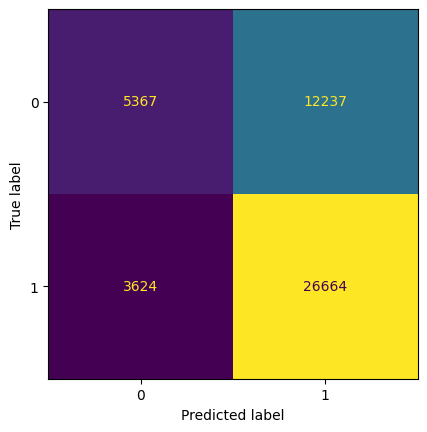

In [10]:
# confusion matrix
ConfusionMatrixDisplay.from_predictions(y_train, lr_pred, colorbar=False)
plt.show()

In [11]:
# fitting the logistic regression model
lr_model.fit(scaled_x_train.values, y_train)

LogisticRegression(max_iter=1000, random_state=101, solver='liblinear')

In [12]:
# getting predictions for the testing set
lr_test_pred = lr_model.predict(scaled_x_test.values)

In [14]:
# classification report of predictions for the testing set
print(classification_report(y_test, lr_test_pred))

              precision    recall  f1-score   support

           0       0.61      0.31      0.41      4401
           1       0.69      0.88      0.77      7572

    accuracy                           0.67     11973
   macro avg       0.65      0.60      0.59     11973
weighted avg       0.66      0.67      0.64     11973


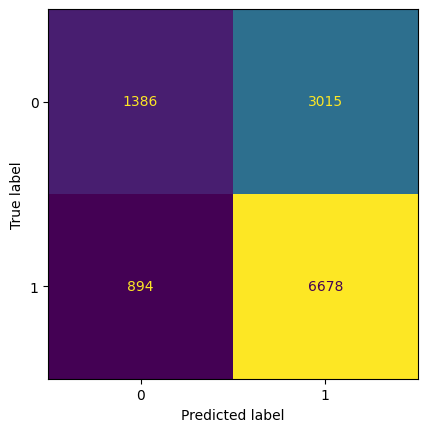

In [15]:
# confusion matrix of predictions for the testing set
ConfusionMatrixDisplay.from_predictions(y_test, lr_test_pred, colorbar=False)
plt.show()